## **Abalone Dataset**

In [1]:
#Imported_libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import random
import pylab
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from matplotlib.cbook import get_sample_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import Image

# 1. Representation Learning

### Importing and Preprocessing

In [2]:
abalone = pd.read_csv("abalone.csv", sep=',', names = ['Sex', 'Length', 'Diameter','Height','Whole_Weight',
     'Shucked_Weight','Viscera_Weight','Shell Weight','Rings'])
abalone.info()
abalone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_Weight    4177 non-null   float64
 5   Shucked_Weight  4177 non-null   float64
 6   Viscera_Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


After importing the Abalone dataset and viewing its info, we can see at a quick glance that there are no missing data, and that all data is numerical except for *Sex*. 
We will remove it before further evaluation, because the remainder of this exercise constitutes comparisons between the functionality of classifiers including PCA. 

We will drop this feature because certain analysis, such as PCA, do not work well with categorical data. Although it is possible to apply PCA on categorical data, even after it has been one hot encoded, it is not good practice. PCA is a rotation of data from one coordinate system to another. So, since categorical data does not technically belong on a coordinate plane, it is better to not apply PCA on it. The reason why we drop this feature from the entire dataset because of PCA is for consistancy. We do keep in mind this may affect accuracies of some classification but it is a trade-off we will take in this case.

We will also remove the column *Rings* as this will be the target column for classification.

Finally, we will do Min-Max Normalization on the remaining data. Although Z-Score may mroe commonly be preferred, in this case we use Min-Max so as to keep all our values positive (since some classifiers will not work with negative values, and we want to keep a consistant normalization of data throughout the assignment. 

In [3]:
abalone2=abalone.copy()
abalone2=abalone2.drop(columns=['Rings','Sex'])

scalar=MinMaxScaler(copy=False)
scalar.fit_transform(abalone2)
abalone2.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell Weight
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313


Before proceeding, we will create an array of all the extracted features (which includes everything the dataset excluding Rings and Sex, called Extracted_Features which consists of the remaining 7 features

And we will also put Rings into a dataframe called target to be used later in the assignment.

In [4]:
Extracted_features = abalone2.loc[:].values  
L=['Rings']
target_=abalone[L]
target=target_.reset_index()
target=target.drop(['index'],axis=1)  
target.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [5]:
print (abalone.Rings.nunique())
abalone.Rings.unique()

28


array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

We can also see that the class feature *Rings* has 28 unique values.

Lastly, we will split the Extracted features into the Train/Validation set which contains 80% of the data, and the Test data which contains the remaining 20%. We min-max normalize the train/valididation set using fit_transform and the test set using transform.

Lastly, the target feature (which is our class Rings in this case)'s test and train set is manipulated to reset its index in ascending order and drop the index column for simplicity. Note that we do not normalize the target 

In [6]:
x_train, x_test, y_train, y_test=train_test_split(Extracted_features,
                                              target,test_size=0.20,
                                              train_size=0.8,
                                              random_state=27)
scalar.fit_transform(x_train)
scalar.transform(x_test)


target_training_set_=y_train.reset_index()
target_training_set=target_training_set_.drop(['index'],axis=1)
target_test_set_=y_test.reset_index()
target_test_set=target_test_set_.drop(['index'],axis=1)

### 1. Produce a plot of the data in the two lowest dimensions for PCA and LDA, using easily distinguishable colours and markers to indicate the labels of each datapoint. Also use the t-SNE method to produce a 2D plot of the datasets. You now have three 2-dimensional plots of each dataset. Comment briefly on any interesting patterns that emerge.

Now, we will carry out Principal Component Analysis on the data with 2 dimensions to create a 2D plot of the datasets. The PCA model is fit on the the normalized train/validation set with fit_transform and on the normalized test set with transform. 

The train/validation and test PCA models are then placed in dataframes, to which we append their respective class labels from the target and make sure to label all the columns correctly. 

Finally the two dataframes train/validation and test are joined to give us the final PCA_Abalone_df DataFrame

In [7]:
pca=PCA(n_components=2)

PCA_train=pca.fit_transform(x_train)
PCA_test=pca.transform(x_test)

PCA_Abalone_df1=pd.DataFrame(data=PCA_train,columns=['PCA1','PCA2'])
PCA_Abalone_df2=pd.DataFrame(data=PCA_test,columns=['PCA1','PCA2'])

PCA_Abalone_df1_train_whole=pd.DataFrame.join(self=PCA_Abalone_df1,other=target_training_set)
PCA_Abalone_df1_test_whole=pd.DataFrame.join(self=PCA_Abalone_df2,other=target_test_set)

PCA_Abalone_df=pd.concat([PCA_Abalone_df1_train_whole,PCA_Abalone_df1_test_whole])
PCA_Abalone_df

,PCA1,PCA2,Rings
0,0.208719,-0.062600,14
1,-0.129078,-0.047703,8
2,-0.599335,0.157857,6
3,-0.116071,-0.056634,9
4,0.021764,0.003747,10
...,...,...,...
831,0.195450,-0.046447,9
832,0.796192,0.165486,10
833,0.568489,0.048774,10
834,-0.586847,0.075105,6


To visualize this feature extraction, we can plot the 2D graph:

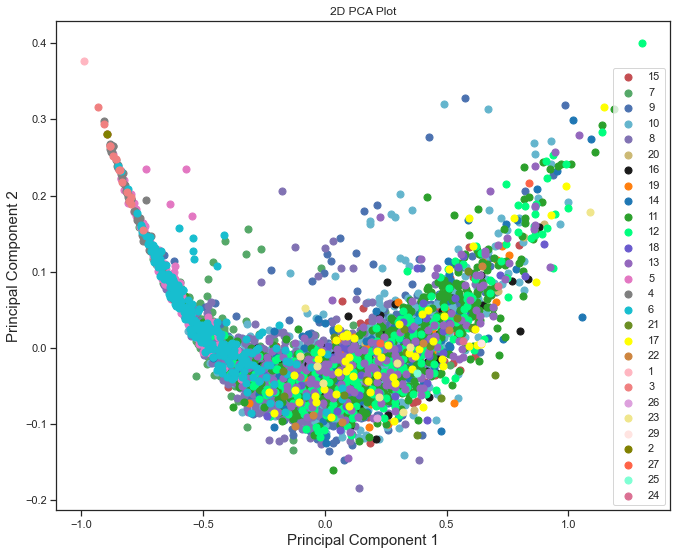

In [8]:
figure = plt.figure(figsize = (11,9))
ax = figure.add_subplot(1,1,1)
ax.set_title('2D PCA Plot')
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_xlabel('Principal Component 1', fontsize = 15)
target2=[15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24]
colors = ['r','g','b','c','m','y','k','tab:orange','tab:blue','tab:green','springgreen',
          'slateblue','tab:purple','tab:pink','tab:grey','tab:cyan',
          'olivedrab','yellow','peru','lightpink','lightcoral','plum','khaki',
          'mistyrose','olive',
          'tomato','aquamarine','palevioletred']
for target2, color in zip(target2, colors):
    indicesTokeep = PCA_Abalone_df['Rings'] == target2
    ax.scatter(PCA_Abalone_df.loc[indicesTokeep, 'PCA1'] , 
               PCA_Abalone_df.loc[indicesTokeep, 'PCA2'],
               c = color,s=50,label=target2)
ax.legend()

From the graph above, it does not appear to be that PCA of dimension 2 gave us a good classification for this dataset, as different classes are overlapping with each other to a large degree. We can see that each solid color (representing a different class of rings) is generally clumped together in clusters but the problem is the clusters are overlapping and not easy to seperate

Now, we will carry out LDA on the dataset again in just two dimensions and plot a graph to help us visualize

In [9]:
lda=LinearDiscriminantAnalysis(n_components=2)

LDA_train=lda.fit(x_train,y_train).transform(x_train)
LDA_test=lda.transform(x_test)

LDA_Abalone_df1=pd.DataFrame(data=LDA_train,columns=['LDA1','LDA2'])
LDA_Abalone_df2=pd.DataFrame(data=LDA_test,columns=['LDA1','LDA2'])

scalar=MinMaxScaler(copy=False)
scalar.fit_transform(LDA_Abalone_df1)
scalar.transform(LDA_Abalone_df2)

LDA_Abalone_df1_train_whole=pd.DataFrame.join(self=LDA_Abalone_df1,other=target_training_set)
LDA_Abalone_df1_test_whole=pd.DataFrame.join(self=LDA_Abalone_df2,other=target_test_set)

LDA_Abalone_df=pd.concat([LDA_Abalone_df1_train_whole,LDA_Abalone_df1_test_whole])
LDA_Abalone_df

,LDA1,LDA2,Rings
0,0.726846,0.351926,14
1,0.589139,0.301057,8
2,0.292836,0.417538,6
3,0.597391,0.255200,9
4,0.583576,0.289517,10
...,...,...,...
831,0.686419,0.279074,9
832,0.578765,0.213780,10
833,0.717428,0.329766,10
834,0.362551,0.376432,6


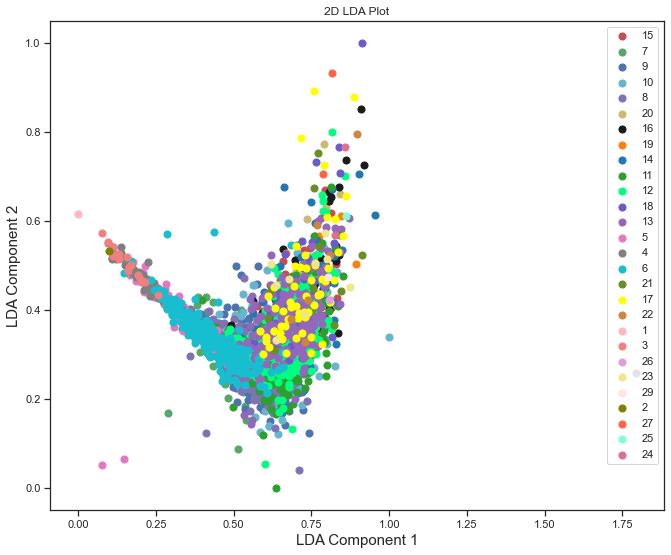

In [10]:
figure = plt.figure(figsize = (11,9))
ax = figure.add_subplot(1,1,1)
ax.set_title('2D LDA Plot')
ax.set_ylabel('LDA Component 2', fontsize = 15)
ax.set_xlabel('LDA Component 1', fontsize = 15)
target2=[15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24]
colors = ['r','g','b','c','m','y','k','tab:orange','tab:blue','tab:green','springgreen',
          'slateblue','tab:purple','tab:pink','tab:grey','tab:cyan',
          'olivedrab','yellow','peru','lightpink','lightcoral','plum','khaki',
          'mistyrose','olive',
          'tomato','aquamarine','palevioletred']
for target2, color in zip(target2, colors):
    indicesTokeep = LDA_Abalone_df['Rings'] == target2
    ax.scatter(LDA_Abalone_df.loc[indicesTokeep, 'LDA1'] , 
               LDA_Abalone_df.loc[indicesTokeep, 'LDA2'],
               c = color,s=50,label=target2)
    ax.legend()

The LDA plot compared to PCA seems to be a closer cluster of points. However, we still observe that LDA of dimension 2 did not give us a good classification for this dataset, as different classes are overlapping with each other to a large degree. We can see that each solid color (representing a different class of rings) is generally clumped together in clusters but the problem is the clusters are overlapping and not easy to seperate

Lastly, we will carry out TSNE Analysis again on 2 dimensions and take a look at the produced 2-D graph

In [11]:
tsne=TSNE(n_components=2).fit_transform(Extracted_features)
TSNE_Abalone_df1=pd.DataFrame(data=tsne,columns=['TSNE1','TSNE2'])
scalar=MinMaxScaler(copy=False)
scalar.fit_transform(TSNE_Abalone_df1)
TSNE_Abalone_df=pd.DataFrame.join(self=TSNE_Abalone_df1,other=target)
TSNE_Abalone_df

,TSNE1,TSNE2,Rings
0,0.666494,0.384289,15
1,0.872908,0.663836,7
2,0.504931,0.720998,9
3,0.642304,0.352050,10
4,0.832063,0.739895,7
...,...,...,...
4172,0.237739,0.648485,11
4173,0.135231,0.639803,10
4174,0.113259,0.353454,9
4175,0.090074,0.422931,10


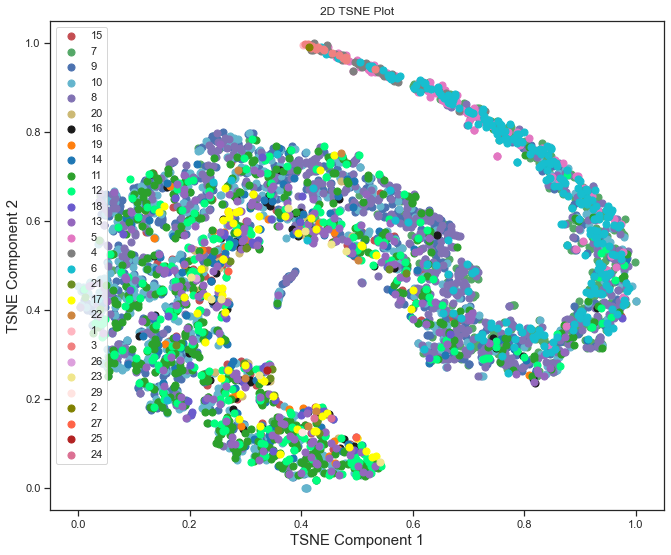

In [12]:
figure = plt.figure(figsize = (11,9))
ax = figure.add_subplot(1,1,1)
ax.set_title('2D TSNE Plot')
ax.set_ylabel('TSNE Component 2', fontsize = 15)
ax.set_xlabel('TSNE Component 1', fontsize = 15)
target2=[15,7,9,10,8,20,16,19,14,11,12,18,13,5,4,6,21,17,22,1,3,26,23,29,2,27,25,24]
colors = ['r','g','b','c','m','y','k','tab:orange','tab:blue','tab:green','springgreen',
          'slateblue','tab:purple','tab:pink','tab:grey','tab:cyan',
          'olivedrab','yellow','peru','lightpink','lightcoral','plum','khaki',
          'mistyrose','olive',
          'tomato','firebrick','palevioletred']
for target2, color in zip(target2, colors):
    indicesTokeep = TSNE_Abalone_df['Rings'] == target2
    ax.scatter(TSNE_Abalone_df.loc[indicesTokeep, 'TSNE1'] , 
               TSNE_Abalone_df.loc[indicesTokeep, 'TSNE2'],
               c = color,s=50,label=target2)
ax.legend()

The TSNE plot has a completely different shape to the PCA and LDA graphs, but yet again, the TSNE classifier of dimension 2 did not give us a good classification for this dataset, as different classes are overlapping with each other to a large degree. We can see that each solid color (representing a different class of rings) is generally clumped together in clusters but the problem is the clusters are overlapping and not easy to seperate


### 2. (PCA Only) Produce a scree-plot to look at the cumulative variance represented by the PCA eigenvectors.

A Scree plot is plotted to display how much variation each principal component in a PCA analysis captures from the data. To best see the plot, we can use all the 7 features for the principal component to accurately view all of their contributions. 

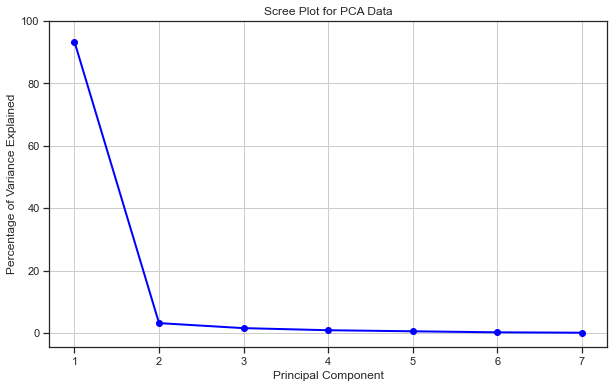

In [13]:
pca=PCA(n_components=7)
pca.fit_transform(x_train)
pca.transform(x_test)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize = (10,6))

plt.plot(PC_values, (pca.explained_variance_ratio_*100), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot for PCA Data')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, 8, 1))
plt.yticks(np.arange(0, 120, 20))
plt.ylabel('Percentage of Variance Explained')
plt.grid()
plt.show()

In [14]:
pca=PCA(n_components=7)
temp=pca.fit_transform(Extracted_features)
pca.explained_variance_ratio_

array([0.93679718, 0.03153659, 0.01626195, 0.0093007 , 0.00260248,
       0.00229245, 0.00120865])

Visually, from the Scree Plot, we can see that over 90% of the data is explained by the first Principal Component alone. If we wanted to pick the first two PCs, we can see that they explain 93.68% + 3.15% = 96.83% of the data, leaving only 3.17% of variance unexplained. 

That seems to be a good Scree Plot, as generally the rule of thumb is to pick enough PCs such that they add up to at least 80% of total variance.

###  3. You now want to experimentally find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a classifier. Produce a plot that shows accuracy of your kNN classifier against number of reduced dimensions being used. The dimensions should listed in increasing order from 2 up to D, the original dimensionality of the dataset. 
### For the kNN classifier, you should choose the best one you found from asg1, one of the weighted versions using a normalized dataset. Comment briefly on the difference in accuracy from asg1.

To do this assessment, we will carry out PCA analysis on a range of different dimensions,  from 2 to 7 (which is the maximum number of features in our current dataset). After each time PCA is carried out with that particular dimension number on the training data, we will use the KNN classifier and note the accuracy on the test data into an array which loops until maximum dimension of 7 is reached.

And then the final graph will be plotted to show us accuracies of the KNN classifier on PCA treated test data for different set dimensions.

From assignment 1, we saw that the best accuracy with KNN on the Abalone dataset was with the Minkowski (default) KNN with k=49 that gave us an accuracy of 27.8%



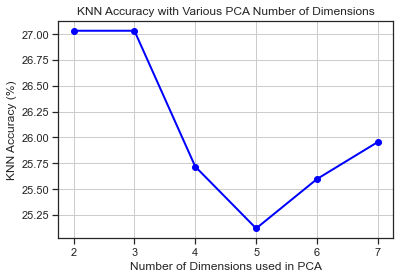

In [15]:
accuracies=[]
pcas=[2,3,4,5,6,7]

x_train, x_test, y_train, y_test=train_test_split(Extracted_features,
                                              target,test_size=0.20,
                                              train_size=0.8,
                                              random_state=27)

for i in range (2,8):

    pca=PCA(n_components=i)      
    knn= KNeighborsClassifier(n_neighbors=49)
    pca=pca.fit(x_train,y_train)
    knn.fit(pca.transform(x_train),y_train)   
    acc_knn = knn.score(pca.transform(x_test), y_test)
    accuracies.append(acc_knn*100)
        
plt.plot(pcas,accuracies, 'o-', linewidth=2, color='blue')
plt.title('KNN Accuracy with Various PCA Number of Dimensions')
plt.xlabel('Number of Dimensions used in PCA')
plt.ylabel('KNN Accuracy (%)')
plt.grid()
plt.show()

We can see from the plot above that the accuracy is at its peak with 2 and 3 dimensions at about **27%**. After that it drops to the lowest accuracy of arounf 25% with 5 dimensions. Then it increases to only about 26% when reaching the highest number of dimensions

In conclusion, compared to the best accuracy with KNN in Assignment one, which was **27.8%**, performing  KNN on a PCA model did not help to increase the accuracy.

### 4. Now run the same analysis as in Question 3 using the LDA method.

Similar to the last question, we will carry out LDA analysis on a range of different dimensions,  from 2 to 7 (which is the maximum number of features in our current dataset). After each time LDA is carried out with that particular dimension number on the training set, we will use the KNN classifier and note its accuracy with the test set into an array which loops until maximum dimension of 7 is reached.

And then the final graph will be plotted to show us accuracies of the KNN classifier on LDA treated data for different set dimensions.

From assignment 1, we saw that the best accuracy with KNN on the Abalone dataset was with the Minkowski (default) KNN with k=49 that gave us an accuracy of 27.8%



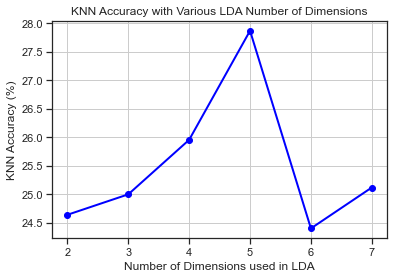

In [16]:
accuracies=[]
x_train, x_test, y_train, y_test=train_test_split(Extracted_features,
                                              target,test_size=0.20,
                                              train_size=0.8,
                                              random_state=27)

for i in range (2,8):
    lda=LinearDiscriminantAnalysis(n_components=i)      
    knn= KNeighborsClassifier(n_neighbors=49)
    lda=lda.fit(x_train,y_train)
    knn.fit(lda.transform(x_train),y_train)   
    acc_knn = knn.score(lda.transform(x_test), y_test)
    accuracies.append(acc_knn*100)
        
plt.plot(pcas,accuracies, 'o-', linewidth=2, color='blue')
plt.title('KNN Accuracy with Various LDA Number of Dimensions')
plt.xlabel('Number of Dimensions used in LDA')
plt.ylabel('KNN Accuracy (%)')
plt.grid()
plt.show()

We can see from the plot above, that the accuracy reached its peak at 5 dimensions with an accuracy of almost **28%**, after which it decreased down to below 24.5% when using 6 dimensions in the LDA model followed by a slight increase when using the maximum dimensions. Compared to the KNN accuracy without reduced dimensions which gave us 27.8%, there is not much of a difference.

When comparing the best accuracies from the LDA and PCA model, the best accuracy for the abalone dataset was with **LDA with 5 dimensions**. 

For further analysis, we will put that in a new dataframe to be used later. 

To do so, we will create an LDA classifier of 5 dimensions, to which we fit the training data and normalize it. We will then transform the test data and normalize it. These train and test sets are concatenated together to get the final LDA_Abalone_df DataFrame.

Since the results of the LDA reduction gives us some negative values, we also make sure to normalize it again using min-max normalization

In [17]:
lda=LinearDiscriminantAnalysis(n_components=5)

LDA_train=lda.fit(x_train,y_train).transform(x_train)
scalar.fit_transform(LDA_train)
LDA_test=lda.transform(x_test)
scalar.transform(LDA_test)

LDA_Abalone_train=pd.DataFrame(data=LDA_train,columns=['LDA 1','LDA 2','LDA 3','LDA 4','LDA 5'])
LDA_Abalone_test=pd.DataFrame(data=LDA_test,columns=['LDA 1','LDA 2','LDA 3','LDA 4','LDA 5'])

scalar=MinMaxScaler(copy=False)
scalar.fit_transform(LDA_Abalone_train)
scalar.transform(LDA_Abalone_test)

LDA_Abalone_df=pd.concat([LDA_Abalone_train,LDA_Abalone_test])
LDA_Abalone_df

,LDA 1,LDA 2,LDA 3,LDA 4,LDA 5
0,0.726846,0.351926,0.806883,0.490831,0.505685
1,0.589139,0.301057,0.756700,0.485902,0.562544
2,0.292836,0.417538,0.672380,0.419650,0.477190
3,0.597391,0.255200,0.804570,0.490351,0.517034
4,0.583576,0.289517,0.698093,0.463985,0.516705
...,...,...,...,...,...
831,0.686419,0.279074,0.742866,0.489327,0.542054
832,0.578765,0.213780,0.390629,0.556816,0.390592
833,0.717428,0.329766,0.635747,0.492827,0.494129
834,0.362551,0.376432,0.734530,0.477107,0.532490


# 2 Naive Bayes Classifier

### Now you will classify the two datasets using the Naive Bayes Classifier. There are a number of these available, for our datasets, the Multinomial Naive Bayes and Complement Naive Bayes forms seem most appropriate, so we will experiment with those.

### 1. Use 5-fold cross validation to compare both versions of Naive Bayes against your previous best results from kNN. Do this on all 4 (or 6) of your datasets and produce a table comparing the accuracies.

First, we split our validation set from the abalone LDA dataset that was just created into 5 sets, and each of their accuracies is printed after using the Multinomial Naive Bayes Classifier, as well as their average. We can then predict the accuracy of the test set with the classifier and print its accuracy as well

In [18]:
MultinomialNB()
clf = MultinomialNB()
clf.fit(LDA_Abalone_train, target_training_set)
k_fold = KFold(n_splits=5, shuffle=True, random_state=27)
cross_valid_accuracies=(cross_val_score(clf,LDA_Abalone_train,
                            target_training_set,cv=k_fold))

print(cross_valid_accuracies)
print (np.mean(cross_valid_accuracies)*100)

clf.fit(LDA_Abalone_train, target_training_set)
predictions=clf.predict(LDA_Abalone_test)
print(accuracy_score(target_test_set,predictions)*100)


[0.18236173 0.16467066 0.1497006  0.1751497  0.16167665]
16.671186774433195
15.789473684210526


We can see from the above results, the accuracy of the 5 CV folds are : 18.2%, 16.4%, 15.0%, 17.5%, 16.2% and their mean is 16.7%. The accuracy when testing on the test set is **15.8%**. This is much lower than the best result from KNN which gave us 28% accuracy

We will now repeat the analysis with the same Multinomial Naive Bayes classifier but with the raw data this time (without reduced dimensions) and extract the same accuracies

In [19]:
MultinomialNB()
clf2 = MultinomialNB()
clf2.fit(x_train, target_training_set)
k_fold2 = KFold(n_splits=5, shuffle=True, random_state=27)
cross_valid_accuracies2=(cross_val_score(clf2,x_train,
                             target_training_set,cv=k_fold2))

print(cross_valid_accuracies2)
print (np.mean(cross_valid_accuracies2)*100)

clf2.fit(x_train, target_training_set)
predictions=clf2.predict(x_test)
print(accuracy_score(target_test_set,predictions)*100)

[0.18684604 0.16467066 0.1497006  0.17365269 0.16167665]
16.730932753327426
15.789473684210526


Here, we see the 5 accuracies from the 5-fold Cross Validation are 18.7%, 16.5%, 15.0%, 17.4%, 16.2% and their mean is 16.7%. The accuracy of the classifier on the test set is **15.8%**. This is much lower than the best result from KNN which gave us 28% accuracy

Comparing between the raw dataset and the LDA reduced dataset, there is no significant difference between their Multinomial Bayes Classification accuracies. 

Now, we repeat the analysis using the Complement Naive Bayes Classifier, starting with the LDA reduced dataset

In [20]:
ComplementNB()
clf = ComplementNB()
clf.fit(LDA_Abalone_train, target_training_set)
k_fold = KFold(n_splits=5, shuffle=True, random_state=27)
cross_valid_accuracies=(cross_val_score(clf,LDA_Abalone_train,
                            target_training_set,cv=k_fold))

print(cross_valid_accuracies)
print (np.mean(cross_valid_accuracies)*100)

clf.fit(LDA_Abalone_train, target_training_set)
predictions=clf.predict(LDA_Abalone_test)
print(accuracy_score(target_test_set,predictions)*100)

[0.23168909 0.22155689 0.25748503 0.23952096 0.24700599]
23.945159009335587
26.19617224880383


We recieve the 5 validation set accuracies to be 23.1%, 22.1%, 25.7%, 24.0%, 24.7% and their mean as 23.9%. The accuracy of the classifier on the test set will be **26.2%**. This is lmost as high as the best result from KNN which gave us 28% accuracy

Now, we repeat the Complement Naive Bayes Classifier on the raw data:

In [21]:
ComplementNB()
clf = ComplementNB()
clf.fit(x_train, target_training_set)
k_fold = KFold(n_splits=5, shuffle=True, random_state=27)
cross_valid_accuracies=(cross_val_score(clf,x_train,
                            target_training_set,cv=k_fold))

print(cross_valid_accuracies)
print (np.mean(cross_valid_accuracies)*100)

clf.fit(x_train, target_training_set)
predictions=clf.predict(x_test)
print(accuracy_score(target_test_set,predictions)*100)

[0.17189836 0.1497006  0.18862275 0.16017964 0.1991018 ]
17.390062923480393
16.74641148325359


This last analysis shows us the 5 validation set accuracies to be 17.2%, 15.0%, 18.9%, 16.1%, 19.9% and their mean as 17.4%. The accuracy of the classifier on the test set is **16.7%**. This is much lower than the best result from KNN which gave us 28% accuracy

Comparing between Complement Naive Bayes on the raw versus LDA reduced data, the LDA data produced much higher accuracies for both the test and validation accuracies. Thus, we can see that Complement Naive Bayes Classifier was useful for this dataset in terms of increasing accuracy, and using the LDA reduced dimension had a huge positive impact


### 2. Complement Naive Bayes is meant to perform better for unbalanced datasets, since our datasets our unbalanced, this seems appropriate, does it make much difference? Try to explain why either way.

The accuracy obtained from Complement Naive Bayes and Multinomial Naive Bayes with the raw data did not have much of a difference. However, the accuracy obtained from Complement Naive Bayes on LDA data was clearly much higher than the Multinomial Naive Bayes classification. That is because Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. Thus, Multinomial Naive Bayes does not perform very well on imbalanced datasets. Imbalanced datasets are datasets where the number of examples of some class is higher than the number of examples belonging to other classes. In our case, the *Rings* class is very imbalanced as the data is spread very irregularly and with various different counts over the unique values of the class, as we can see below:

In [22]:
abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# 3. Decision Trees Classifier

### You will now do classification on your datasets using Decision Trees. Decision Trees have a number of parameters that can effect peformance. You can use the GridSearchCV function for this question.

###  1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset • the maximum depth of trees

Here, we use the GridSearchCV function to search for the best parameter 'Maximum Depth'. The criterea that we use to actually measure the best result among a range of depth options is the Gini Impurity, which measures how 'pure' a class is ie, how many classes exist in the pool of datapoints.

The arbitrary range of tree depth we choose to evaluate is from depth 1 to 15. The code we write checks the accuracy of the train/validation to see what the best parameter value is. First, we do the analysis on the raw data.

In [23]:
DTbase = DecisionTreeClassifier(max_features = 'auto', random_state = 0)
param_grid = {'criterion': ['gini'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],}
DT_fit = GridSearchCV(estimator=DTbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
DT_result = DT_fit.fit(x_train, y_train)
DT_raw=DT_result.best_estimator_
DT_raw

DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=0)

Now that we see the best depth is 4, we can train a new decision tree with that parameter and test it on the unseen test data and check its accuracy

In [24]:
DTbase = DecisionTreeClassifier(max_features = 'auto', random_state = 0,max_depth=4)
DTbase.fit(x_train, y_train)
DTbase.score(x_test,y_test)*100

25.837320574162682

We can see the accuracy is **25.8%**, which is about the same as the maximum accuracy from the training data as well.

Now, we repeat the same analysis on the best reduced data which was LDA with 5 dimensions.

In [25]:
DTbase2 = DecisionTreeClassifier(max_features = 'auto', random_state = 0)
param_grid2 = {'criterion': ['gini'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
DT_fit2 = GridSearchCV(estimator=DTbase2, param_grid=param_grid2, cv = 5, refit='accuracy_score')
DT_result2 = DT_fit2.fit(LDA_train, y_train)
DT_LDA=DT_result2.best_estimator_
DT_LDA

DecisionTreeClassifier(max_depth=7, max_features='auto', random_state=0)

The best parameter in this case is with a depth of 7, which means the LDA data took more depth to reach its highest accuracy.

Now, we test on the actual unseen test set using the depth of 7 on the LDA fit decision tree, and check the accuracy

In [26]:
DTbase2 = DecisionTreeClassifier(max_features = 'auto', random_state = 0,max_depth=7)
DTbase2.fit(LDA_train, y_train)
DTbase2.score(LDA_test,y_test)

0.24401913875598086

The obtained accuracy is **24.4%** which is a lower accuracy than the raw data.

So in conclusion, the raw dataset has a lower best parameter of max depth than the LDA dataset

### 2. Produce a plot showing the mean accuracy above parameter.

Using the decision tree that was created with the raw data earlier, we will plot the accuracies recieved with the training set against the range of max depth options

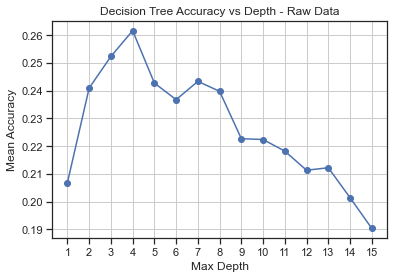

In [27]:
results_df = pd.DataFrame(DT_result.cv_results_)
df1= results_df.loc[results_df['param_criterion'] == 'gini']
plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'], df1["mean_test_score"], '-o')
plt.title('Decision Tree Accuracy vs Depth - Raw Data')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.grid()

We can visually check the graph above to see the best accuracy is around 26% when using a depth of 4 in the decision tree which was confirmed with the best_estimator_ function on the classifier.

Now, we repeat the same analysis and plot the graph for the Decision Tree created with the LDA dataset.

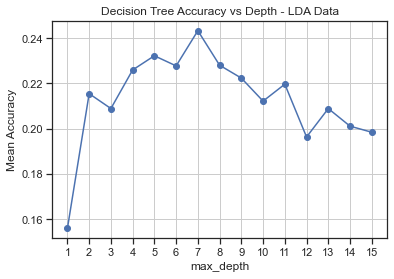

In [28]:
results_df2 = pd.DataFrame(DT_result2.cv_results_)
df2= results_df2.loc[results_df2['param_criterion'] == 'gini']
plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'], df2["mean_test_score"], '-o')
plt.title('Decision Tree Accuracy vs Depth - LDA Data')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy')
plt.grid()

This time we see the best accuracy is around 24% with a depth of 7. This is a lower accuracy than the raw data, and takes more depth to reach that lower accuracy. 

So in conclusion, when comparing the accuracy (measured with Gini Impurity) of the decision tree with respect to the max_depth parameter, it seems that the raw data performs better (and with less depth)

### 3. Interpretability: Use the decision tree library functions, to examine the finall resulting splitting rules used for the trees. Do they indicate any interesting patterns that explain the data? Can you find support for this from any analysis you've done or see on this dataset previously? For this part, use original raw feature space only.

Using the raw data only, we will plot a decision tree to take a better look at the splitting rules used from the tree

Text(0.5, 1.0, 'Decision Tree - Raw Data')

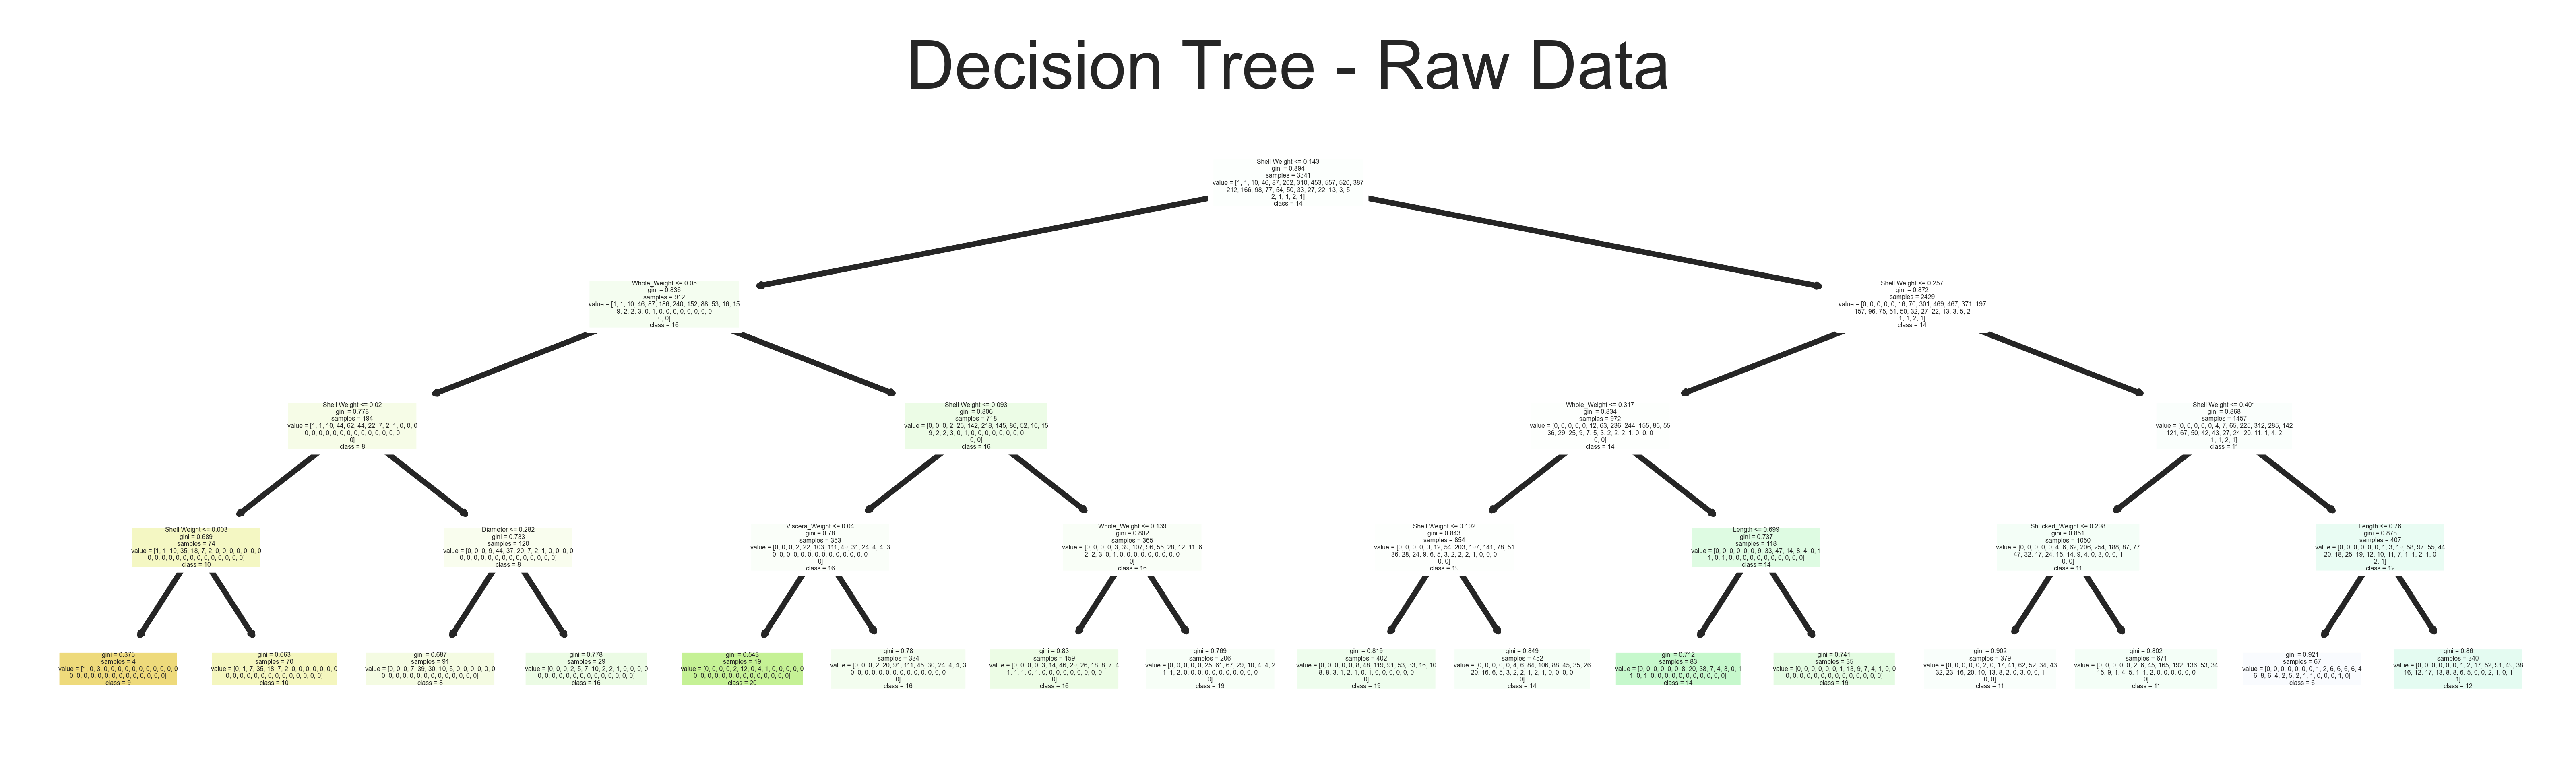

In [29]:
fn=['Length', 'Diameter','Height','Whole_Weight','Shucked_Weight','Viscera_Weight','Shell Weight']
cn=['15','7','9','10','8','20','16','19','14','11','12','18','13',
    '5','4','6','21','17','22','1','3','26','23','29','2','27','25','24']
fig2, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,2), dpi=1000)
tree.plot_tree(DT_raw,feature_names=fn, class_names=cn,
                             filled=True, rounded=True)
plt.title('Decision Tree - Raw Data')

The decision tree above shows us some interesting observations that can be seen with the splitting pattern. A significant advantage of a decision tree is that it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion. It creates a comprehensive analysis of the consequences along each branch and identifies decision nodes that need further analysis. For each split, the Gini Impurity of each child node is individually calculated. The split with the lowest value of Gini Impurity is then selected.

In this specific tree, We can observe that the root node was first split at Shell_Weight <= 0.143 and gini impurity value of 0.894. The next split is at Whole_Weight <=0.05(further split into Shell Weight <= 0.02 and Shell Weight <= 0.093) and  Shell_Weight <=-0.257(further split into Shell Weight and Whole_Weight). The splitting is balanced with equal branching on the right side of root node and left node. This splitting continues similarly until each of the resulting child nodes end up with 2 leaf nodes.

The splitting is balanced with equal branching on the right side of root node and left node. This splitting continues similarly until each of the resulting child nodes end up with 2 leafnodes. In the final splitting, the pattern that can be observed is that the final child node splits are either on Shell Weight, Diameter, Viscera_Weight, Whole_Weight and length. It is interesting to note that some leaves have much higher samples compared to others ie, the first leaf on the left has only samples, while the third leaf from the right has 671. This means that the classification will have some imbalance in terms of number of samples. 

# 4 Random Forest Classifier

### You will now do classifcation on your datasets using Random Forests. Random Forests have a number of parameters that can effect peformance. You can use the GridSearchCV function for this question.

### 1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset.
### • the maximum depth of trees, you can try values as low as 2 or 3 and as high as needed, decision trees have an upper limit on how deep they can go determine by the size of the dataset.
### • the number of trees, try values at regular intervals, you can go as low as 3 and as high as a few hundred trees.

On the raw and LDA dataset both, we will use 5-fold cross validation to find the best parameters for the maximum depth and the number of trees. 

The range for the maximum depth of trees was chosen to be starting from 10, iterating 100 steps until 410 trees.
We will start with the raw data:

In [30]:
RFbase = RandomForestClassifier(max_features = 'auto', random_state = 0)
param_grid = {'n_estimators' : [10, 110,210,310,410],'max_depth': [2,4,6,8,10],}
RF_fit = GridSearchCV(estimator=RFbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
RF_result = RF_fit.fit(x_train, y_train)
RF_results_df = pd.DataFrame(RF_result.cv_results_)
RF_raw=RF_result.best_estimator_
RF_raw

RandomForestClassifier(max_depth=4, n_estimators=310, random_state=0)

We can see the best parameters between the ones we listed were: 310 for the number of trees and 4 for the maximum depth. So, we can test the accuracy on the raw test set of a random forest with those settings

In [31]:
RFbase = RandomForestClassifier(max_features = 'auto', random_state = 0,max_depth=4,n_estimators=310)
RFbase.fit(x_train, y_train)
RFbase.score(x_test,y_test)*100

27.751196172248804

We can see the accuracy when testing on the raw test data with the best parameters gives us **27.8%**.

Now, we will repeat that same analysis with the LDA data

In [32]:
RFbase2 = RandomForestClassifier(max_features = 'auto', random_state = 0)
param_grid2 = {'n_estimators' : [10, 110,210,310,410],'max_depth': [2,4,6,8,10],}
RF_fit2 = GridSearchCV(estimator=RFbase2, param_grid=param_grid2, cv = 5, refit='accuracy_score')
RF_result2 = RF_fit2.fit(LDA_train, y_train)
RF_LDA=RF_result2.best_estimator_
RF_LDA

RandomForestClassifier(max_depth=6, n_estimators=210, random_state=0)

We can see the best parameters between the ones we listed this time are: 210 for the number of trees and 6 for the maximum depth. Compared to the raw data, the best maximum depth increased from 4 to 6, and the best number of trees decreased from 310 to 210. 

Now, we can test the accuracy on the LDA test set of a random forest with these settings

In [33]:
RFbase2 = RandomForestClassifier(max_features = 'auto', random_state = 0,max_depth=6,n_estimators=210)
RFbase2.fit(LDA_train, y_train)
RFbase2.score(LDA_test,y_test)*100

28.11004784688995

We can see the accuracy when testing on the LDA test data with the best parameters gives us **28.1%**.

In conclusion, the LDA data gave about the same accuracy as the raw data but that was achieved with a lower number of trees but a higher maximum depth.

The higher maximum depth may be because the feature reduction may have removed some features which were crucial for earlier splitting in the random forest. 



### 2. Produce a plot showing the mean accuracy above parameter settings. This can be done as a heat plot showing a grid of mean accuracies for different combinations of the two parameters.

We will now take a look at the accuracies achieved from the different range of parameters that we chose from in q1 to get a better idea of the trends. 

First, we will create the heat map of mean accuracies of the random forest on the raw data

[Text(0.5, 12.5, 'Maximum Depth'), Text(30.5, 0.5, 'Number of Trees')]

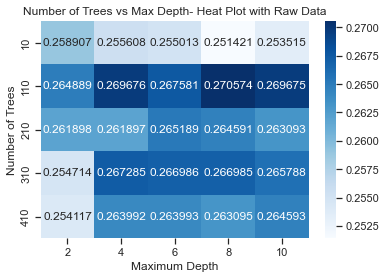

In [34]:
RF_results_df = pd.DataFrame(RF_result.cv_results_)
x_axis_labels = [2,4,6,8,10]
y_axis_labels = [10,110,210,310,410]
data = np.array(RF_results_df["mean_test_score"])
data = data.reshape(5,5)
plt.title('Number of Trees vs Max Depth- Heat Plot with Raw Data')
ax = sns.heatmap(data, annot=True, cmap="Blues",fmt='f',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set(xlabel='Maximum Depth', ylabel='Number of Trees')

From the heatmap above, we can observe the higher accuracies (shown in darker blue) iare concentrated at a number of trees of 110. The lowest accuracies were achieved with the smallest number of trees which was 10. We observe that increasing depth also raised the accuracy but not as much as increasing the number of trees.

We will now plot the same heat map but with the LDA data now

[Text(0.5, 12.5, 'Maximum Depth'), Text(30.5, 0.5, 'Number of Trees')]

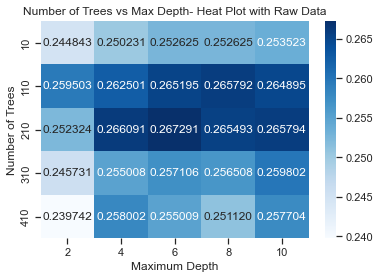

In [35]:
RF_results_df2 = pd.DataFrame(RF_result2.cv_results_)
x_axis_labels = [2,4,6,8,10]
y_axis_labels = [10,110,210,310,410]
data2 = np.array(RF_results_df2["mean_test_score"])
data2 = data2.reshape(5,5)
plt.ylabel('Number of Trees')
plt.xlabel('Maximum Depth')
plt.title('Number of Trees vs Max Depth- Heat Plot with Raw Data')
ax = sns.heatmap(data2, annot=True, cmap="Blues",fmt='f',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set(xlabel='Maximum Depth', ylabel='Number of Trees')

In this heat map, we can see the highest accuracies are centered at 110 and 210 trees. Once again, increasing the depth does increase the accuracy to a degree (from depth 2 to 4) but it doesnt vary much after a point (after depth of 4). We can see that accuracy actually has more of a positive impact from increasing number of trees.

# 5. Gradient Tree Boosting

### You will now do classification on your datasets using Gradient Tree Boosting (on sklearn it is GradientBoostingClassifier): This algorithm has a number of parameters that can effect peformance. You can use the GridSearchCV function for this question.



### 1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for classification on each dataset.
### • the number of estimators, try values at regular intervals, you can go as low as 3 and as high as a few hundred estimators.
### Note: the number of `trees' grown by GBT is n classes  x n estimators but this is handled automatically.

On the raw and LDA dataset both, we will use 5-fold cross validation to find the best parameters for the number of estimators 

The range was intially chosen to be starting from 10, iterating 150 steps until 310 estimators, but it was observed that the best parameter was 10 estimators in that case. So, in order to rule out the reason for that being the algorithm works best for whatever the lowest n_estimator in the range is, we add '5' to our options
We will start with the raw data:

In [36]:
GTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {'n_estimators' : [5,10,160,310]}
GT_fit = GridSearchCV(estimator=GTbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
GT_result = GT_fit.fit(x_train, y_train)
GT_results_df = pd.DataFrame(GT_result.cv_results_)
GT_raw=GT_result.best_estimator_
GT_raw

GradientBoostingClassifier(max_features='auto', n_estimators=10, random_state=0)

We can see the best parameters between the ones we listed was 10 number of estimators. 

Since Gradient Boosted decision trees work in a way that each next tree attempts to model and correct for the errors made by the sequence of previous trees, one might think the accuracy would keep increasing with number of trees. However, in reality, adding more trees beyond a limit does not necessarily improve the performance of the model, and it can quickly reach a point of diminishing return.

Now, we will test the accuracy of this best setting on the test data.

In [37]:
GTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0,n_estimators=10)
GTbase.fit(x_train, y_train)
GTbase.score(x_test,y_test)*100

27.033492822966508

We can see the accuracy when testing on the raw test data with the best parameters gives us **27.0%**.

Now, we will repeat that same analysis with the LDA data

In [38]:
GTbase2 = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid2 = {'n_estimators' : [5,10,160,310]}
GT_fit2 = GridSearchCV(estimator=GTbase2, param_grid=param_grid2, cv = 5, refit='accuracy_score')
GT_result2 = GT_fit2.fit(LDA_train, y_train)
GT_results_df2 = pd.DataFrame(GT_result2.cv_results_)
GT_LDA=GT_result2.best_estimator_
GT_LDA

GradientBoostingClassifier(max_features='auto', n_estimators=10, random_state=0)

We can see that the best parameter for the Gradient Boosted Classifier with the LDA Data is also 10, as it doesnt take a very large number of estimators for our particular dataset to reach the best accuracy with this classifier.

We proceed to test this 'best' model on the LDA test data to see the accuracy

In [39]:
GTbase2 = GradientBoostingClassifier(max_features = 'auto', random_state = 0,n_estimators=10)
GTbase2.fit(LDA_train, y_train)
GTbase2.score(LDA_test,y_test)*100

24.52153110047847

The accuracy obtained here is **24.5%** which is slightly lower than the Gradient boosted tree classification performed on the raw data. This may be because dimension reduction might have removed features which were required for splitting that increased the accuracy

### 2. Produce a plot showing the mean accuracy above parameter settings. This can be done as a heat plot showing a grid of mean accuracies for different combinations of the two parameters.

Since we only have one parameter in this case that we did a Grid Search on to find the best parameter, it is not possible to do a heat map to explain the trend in accuracy. Instead, we can plot a simple scatter plot to show the trend of accuracy between the range of parameter (number of estimators) that we tested for. These displayed accuracies will be the average of the 5 accuracies on the train/validation set after 5-fold split.

Text(0, 0.5, 'Mean Accuracy')

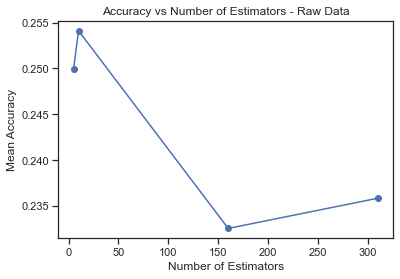

In [40]:
GTbase = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid = {'n_estimators' : [5,10,160,310]}
GT_fit = GridSearchCV(estimator=GTbase, param_grid=param_grid, cv = 5, refit='accuracy_score')
GT_result = GT_fit.fit(x_train, y_train)
GT_results_df = pd.DataFrame(GT_result.cv_results_)
results_df = pd.DataFrame(GT_result.cv_results_)
x=results_df['param_n_estimators']
y=results_df['mean_test_score']
plt.plot(x,y,'-o')
plt.title('Accuracy vs Number of Estimators - Raw Data')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

We can see that the initial increase in estimators from 5 to 10 did increase the accuracy to a peak of 25.4%, after which the accuracy dropped to around 23%.

We will now repeat this analysis with the LDA Dataset

Text(0, 0.5, 'Mean Accuracy')

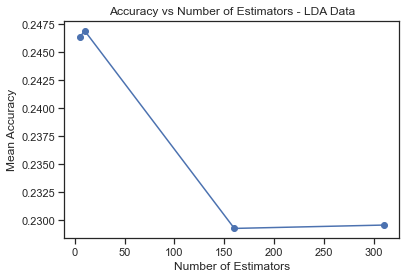

In [41]:
GTbase2 = GradientBoostingClassifier(max_features = 'auto', random_state = 0)
param_grid2 = {'n_estimators' : [5,10,160,310]}
GT_fit2 = GridSearchCV(estimator=GTbase2, param_grid=param_grid2, cv = 5, refit='accuracy_score')
GT_result2 = GT_fit2.fit(LDA_train, y_train)
GT_results_df2 = pd.DataFrame(GT_result2.cv_results_)
results_df2 = pd.DataFrame(GT_result2.cv_results_)
a=results_df2['param_n_estimators']
b=results_df2['mean_test_score']
plt.plot(a,b,'-o')
plt.title('Accuracy vs Number of Estimators - LDA Data')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

We see a similar trend in the LDA Data to the previous raw data where the accuracy reaches its peak at 24.7% with 10 estimators and then drops to around 23% after that. 

The drop in accuracy with an increase of estimators may be because our dataset has a lot of noise. Boosting can 'focus' on correctly predicting cases that contain misinformation, and in the process actually worsen the average performance on other cases that are more substantial.

### References
1. https://bioturing.medium.com/how-to-read-pca-biplots-and-scree-plots-186246aae063`
2. https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume11/opitz99a-html/node14.html
3. https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
4. https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
5.https://scikitlearn.org/0.16/auto_examples/classification/plot_classifier_comparison.html#example-classification-plot-classifier-comparison-py
6. https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
7. https://www.geeksforgeeks.org/naive-bayes-classifiers/
8. https://brainly.in/question/32814833